# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#data_dathering">Data Gathering</a></li>
<li><a href="#Assessing_data">Assessing Data</a></li>
<li><a href="#cd">Cleaning Data</a></li>
<li><a href="#aav">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Data Gathering
Gathering **all** three pieces of data for this project and load them in the notebook. 

Import `modules` in the notebook

In [246]:
# importing packages in order to gather data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import os
import json
import re
import tweepy
import matplotlib.figure
%matplotlib inline

### 1. Downloading the `WeRateDogs` Twitter archive data `(twitter_archive_enhanced.csv)`

> The file was downloaded manually from `https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv` URL which was provide in the classroom to my working project directory and used the `pd.read_csv('twitter_archive_enhanced.csv')` to load it to a Pandas DataFrame in a jupter notebook.

In [247]:
# Loading twitter_archive_enhanced.csv' into the dataframe

df_archive = pd.read_csv('twitter_archive_enhanced.csv')

### 2. Downloding tweet image prediction (image_predictions.tsv) programmatically using Requests library

In [248]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save tsv file 
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

> Loading image_predictions.tsv into the notebook

In [249]:
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

In [250]:
# Save in csv form
df_image.to_csv('images_predictions.csv', index=False)

In [251]:
df_images = pd.read_csv('images_predictions.csv')

### 3. Loading additional data via the Twitter API (data-json.txt) into the notebook

> `data_json.txt` was downloaded manually as it was provided in udacity classroom. After downloading, this file is being read in the line by line to pandas Dataframe with `tweet id`, `favorite count` and `retweet count`.  

In [252]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_extracted_data.tweet_id.values
len(tweet_ids)

# set a function for tweet extraction
# file already created so no need to execute to continue the notebook
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

> The above codes were copied-pasted in the jupter notebook from udacity classroom.

In [253]:
# Creating a list to store data extracted from the JSON file
data = []

# JSON file needed to be opened and then iterate through its lines
with open("tweet-json.txt", 'r') as f:
    
    # In the following codes, Each line represents a JSON object, each of which is composed of a set of objects
    for line in f:
        # Loading the line object
        line_data = json.loads(line)
        
        # now we need to extract the targeted columns ('id', 'favorite_count' and 'retweet_count')
        tweet_id = line_data["id"]
        favorite_count = line_data["favorite_count"]
        retweet_count = line_data["retweet_count"]
        
        
        # Now lets add extracted data to a list
        data.append({'tweet_id': tweet_id, 
                     'favorite_count': favorite_count, 
                     'retweet_count': retweet_count
                         })
        
# We can now create a dataframe out of the extracted data
df_extracted_data = pd.DataFrame(data, columns=["tweet_id", "favorite_count", "retweet_count"])

df_extracted_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [254]:
# Save in csv form
df_extracted_data.to_csv('json_data.csv', index=False)

In [255]:
extracted_data = pd.read_csv('json_data.csv')

<a id='Assessing_data'></a>
## Assessing Data

In this section, Eight(8) quality issues and two (2) tidiness issues are going to be detected and documented. To assess data, I will use both visual and programmatic assessments.

The following points are to be followed when we access my data:

I only want original ratings (no retweets) that have images, not all are dog ratings and some are retweets.
Despite that the rating numerators are greater than the denominators, I will not clean them.
I will not gather the tweets beyond August 1st, 2017. 

*Assessing data Vissually `(df_archive, df_image and extracted_data)` for quality and tidiness issues  visually.*

> Read all three dataFrame 

In [256]:
# reading df_archive
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [257]:
# reading df_image
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [258]:
# reading df_data
extracted_data

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


> Assessing data(df_archive, df_image and extracted_data) for quality and tidiness issues programmatically.

In [259]:
# Display a basic summary of df_archive DataFrame using .info
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [260]:
# Display a basic summary of df_image DataFrame using .info
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [261]:
# Display a basic summary of extracted_data DataFrame using .info
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


> Non-directed Programmatic Assessment using .sample()

In [262]:
# Sampling achirve advanced dataframe
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
1317,706593038911545345,NaN,NaN,2016-03-06 21:31:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sneak peek of me on spring break. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706593038...,10,10,None,None,None,None,None
1502,692041934689402880,NaN,NaN,2016-01-26 17:50:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Teddy. His head is too heavy. 13/10 (v...,NaN,NaN,NaN,https://vine.co/v/iiI3wmqXYmA,13,10,Teddy,None,None,None,None
2320,666437273139982337,NaN,NaN,2015-11-17 02:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a lone northeastern Cumberbatch. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666437273...,7,10,None,None,None,None,None
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,None,None,pupper,None


In [263]:
# Sampling achirve advanced dataframe
df_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True
272,670826280409919488,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,0.014837,False
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
1724,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
74,667393430834667520,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True
1403,769212283578875904,https://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,1,golden_retriever,0.166538,True,Pekinese,0.148215,True,cocker_spaniel,0.082735,True
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,0.006892,True


In [264]:
# Sampling achirve advanced dataframe
extracted_data.sample(5)

,tweet_id,favorite_count,retweet_count
422,821765923262631936,9317,1899
1592,686377065986265092,2433,637
1967,673317986296586240,924,293
1036,744334592493166593,7443,2412
1175,719704490224398336,4974,1645


In [265]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [266]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [267]:
extracted_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


Let's check to see if there are missing dog names in archive table.

In [268]:
df_archive.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [269]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [270]:
df_images.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [271]:
df_images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [272]:
extracted_data.isnull()

,tweet_id,favorite_count,retweet_count
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2349,False,False,False
2350,False,False,False
2351,False,False,False
2352,False,False,False


In [273]:
extracted_data.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [274]:
# Check if there are any records in df_archive which are retweets
len(df_archive[df_archive.retweeted_status_id.isnull() == False])

181

Let's check to see if we have duplicates in our datasets

In [275]:
all_columns = pd.Series(list(df_archive) + list(df_images) + list(extracted_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

let's take a look at the dog names we have in our dataset.

In [276]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [277]:
df_archive[df_archive.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


#### After visual and programmatic assessment, Quality and tidiness Assessment looks like this:

### Quality issues

##### Completeness

1. Missing values in several columns of df_archive dataframe

##### Validity

2. Values are presented as hyperliks insted of URLs in 'source' column of archive dataframe

3. 'expanded_urls' column in archive dataframe have some missing values

4. archive dataframe having retweet values


##### Accurancy

5. image predictions dataframe has Non-descriptive column name such as `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`)

6. Dataset contains data beyond 08/01/2017

7. Erroneous data types (tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)


##### Consistancy

8. Some names have underscores, and are starting with capital letters in `('p1', 'p2', and 'p3' columns)`

9. Some dog names in a 'name' column of archive are set to article(`'a') and `None`

### Tidiness issues
1. df_archive data table needs to be merged with extracted_data table, and then merge with image predition dataset

2. Archive dataframe has four columns namely; `doggo, floofer, pupper, puppo` which are for a single variable `dog stage`

## Other table issues

- archive dataframe contains 181 retweet values
- tweets with no pictures

<a id='cd'></a>
## Cleaning Data
In this section, **all** of the issues documented while assessing data will be cleaned. 

Making a copy of the original data before cleaning. Cleaning will include merging individual pieces of data.

In [278]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
df_extracted_clean = df_extracted_data.copy()

### Quality Issues

### Issue #1: archive dataframe having retweet value

#### Define

> Removing retweets and replies as we only want original data.

#### Code

In [279]:
df_archive_clean = df_archive_clean[np.isnan(df_archive_clean.retweeted_status_id)]

### Test

In [280]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [281]:
# Remove the following columns:
df_archive_clean = df_archive_clean.drop(['retweeted_status_id', \
                                  'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [282]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Issue #2: Missing values in several columns of df_archive dataframe

#### Define:

> Archive dataframe has columns; in_reply_to_status_id, in_reply_to_user_id with null values. Since these columns are unnecessary for my analysis, I will just drop them. 

#### Code

In [283]:
# dropping all unnecessary columns from the archive dataframe values
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [284]:
# checking if the codes were successful
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [285]:
df_archive_clean.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         58
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### Issue #3: Values are presented as hyperliks instead of URLs in 'source' column of archive dataframe

#### Define

> Removing hyperlinks by extracting URLs from the provided links in the `source` column of archive dataframe using extract() and regex

#### Code

In [286]:
# Extracting URLs from hyperlinks
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
df_archive_clean.source = df_archive_clean.source.str.extract(pattern, expand=False)

#### Test

In [287]:
#Checking if the codes were successfully
df_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Issue #4:  `'expanded_urls'` column in archive dataframe have some missing values

#### Define

> null values in `'expandes_urls'` can not be restrived, so i will just drop the null values in the dataset

#### Code

In [288]:
#drop null values 
df_archive_clean.dropna(inplace=True)

#### Test

In [289]:
df_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #5: Some names have underscores, and are starting with capital letters in ('p1', 'p2', and 'p3' columns)

#### Define

> Removing underscore ('_') by replacing them with '' (empty string), and start each first letter of the word with a lowercase.

#### Codes

In [290]:
df_images_clean['p1'] = df_images_clean['p1'].str.replace('_',' ').str.lower()

In [291]:
df_images_clean['p2'] = df_images_clean['p2'].str.replace('_',' ').str.lower()

In [292]:
df_images_clean['p3'] = df_images_clean['p3'].str.replace('_',' ').str.lower()

#### Test

In [293]:
df_images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #6: image predictions dataframe has Non-descriptive column name such as p1, p1_conf, p1_dog, p2,   p2_conf, p2_dog, p3, p3_conf, p3_dog)

#### Define

> Making the names more descriptive for easy understanding.

#### Code

In [294]:
# Rename above columns
df_images_clean.rename(columns={"p1":"first_probability", 
                                    "p1_conf":"probability_conf1", 
                                    "p1_dog":"is_dog_1",
                                    "p2":"second_probability", 
                                    "p2_conf":"probability_conf2", 
                                    "p2_dog":"is_dog_2",
                                    "p3":"third_probability", 
                                    "p3_conf":"probability_conf3", 
                                    "p3_dog":"is_dog_3"}, 
                           inplace=True)

### Test

In [295]:
df_images_clean.head()

,tweet_id,jpg_url,img_num,first_probability,probability_conf1,is_dog_1,second_probability,probability_conf2,is_dog_2,third_probability,probability_conf3,is_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #6: Dataset contains data beyond 08/01/2017

#### Define

> Remove all existing data that are beyond 08/01/2017

#### Code

In [296]:
# Excluding tweets data beyond 08/01/2017, as well as retweets
initial_counts = len(df_archive_clean)
df_archive_clean = df_archive_clean[(df_archive_clean.timestamp < "2017-08-02")]
end_counts = len(df_archive_clean)
removed_counts = initial_counts - end_counts

#### Test

In [297]:
# Checking if the code were successful

df_archive_clean[df_archive_clean.timestamp >= "2017-08-02"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7: 

> Erroneous data types (tweet_id, in_reply_to_status_id,`timestamp` in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)

#### Define

Since `tweet_id, in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` have been dropped, I will just change the datetype for `timestamp` column

#### Code

In [298]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

#### Test

In [299]:
#checking if the code was successful

df_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

## tidiness Issues

## Issue #1: 
> df_archive data table needs to be merged with extracted_data table, and then merge with image predition dataset

### Define

> merging three tables into one dataframe

### Code

In [300]:
# Joining archive dataframe and extracted dataframe
df_archive_clean = df_archive_clean.merge(df_extracted_clean, how="left", left_on="tweet_id", right_on="tweet_id")

# Then joining archive dataframe and image predictions dataframe
df_archive_clean = df_archive_clean.merge(df_images_clean, how="left", left_on="tweet_id", right_on="tweet_id")

### Test

In [301]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,first_probability,probability_conf1,is_dog_1,second_probability,probability_conf2,is_dog_2,third_probability,probability_conf3,is_dog_3
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


### Issue #2: 
> Archive dataframe has four columns namely; doggo, floofer, pupper, puppo which are for a single variable dog stage

### Define

> Combine `doggo`, `floofer`, `pupper`, `puppo` into one column called dog_stage, and then I will drop the original columns.

### Code

In [302]:
# collect the list of the columns that need cleaning before extracting our data
cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_clean[cols] = df_archive_clean[cols].replace('None', '')

# Combining the values
df_archive_clean['dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo
df_archive_clean.loc[df_archive_clean.dog_stage =='doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_archive_clean.loc[df_archive_clean.dog_stage =='doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_archive_clean.loc[df_archive_clean.dog_stage =='doggopupper', 'dog_stage'] = 'doggo, pupper'

# Drop the original (four) columns
df_archive_clean.drop(columns=cols, inplace=True)

### Test

In [303]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,first_probability,probability_conf1,is_dog_1,second_probability,probability_conf2,is_dog_2,third_probability,probability_conf3,is_dog_3,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,...,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,...,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,


Lets check for shape of our new data

In [304]:
df_archive_clean.shape

(2117, 22)

In [305]:
df_archive_clean.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           0
rating_numerator        0
rating_denominator      0
name                    0
favorite_count          0
retweet_count           0
jpg_url               123
img_num               123
first_probability     123
probability_conf1     123
is_dog_1              123
second_probability    123
probability_conf2     123
is_dog_2              123
third_probability     123
probability_conf3     123
is_dog_3              123
dog_stage               0
dtype: int64

In [306]:
df_archive_clean.dropna(inplace=True)

In [307]:
df_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
favorite_count        0
retweet_count         0
jpg_url               0
img_num               0
first_probability     0
probability_conf1     0
is_dog_1              0
second_probability    0
probability_conf2     0
is_dog_2              0
third_probability     0
probability_conf3     0
is_dog_3              0
dog_stage             0
dtype: int64

### Issue #9: 
> Some dog names in a 'name' column of archive are set to article(`'a',) and None

#### Define

> the name `a` together with None values in the `name` column will be change to NaN, and then will be dropped.

#### Code

In [308]:
#changing `a` value in `name` column to NaN
df_archive_clean['name'] = df_archive_clean['name'].replace('a', np.NaN)

In [309]:
#Change missing values in 'name' from 'None' to NaN 
df_archive_clean['name'] = df_archive_clean['name'].replace('None', np.NaN)

In [310]:
#Then drop all null values
df_archive_clean.dropna(inplace=True)

#### Test

In [311]:
# checking if the codes were successful
df_archive_clean.name.isnull().sum()

0

## Other data table issues

##### 1. Tweets with no pictures


#### Define

> Removing all tweets at have no pictures with them

#### Code

In [312]:
# Delete tweets with no pictures
df_archive_clean = df_archive_clean.dropna(subset = ['jpg_url'])


#### Test

In [313]:
df_archive_clean.shape

(1393, 22)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [314]:
df_archive_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='aav'></a>
## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data. I will produce at least **three (3) insights and one (1) visualization.**

In [315]:
#Loading my cleaned data
df = pd.read_csv('twitter_archive_master.csv')

### Insights:

###### 1. Do the dog names with high favorite counts get more retweet counts?

In [316]:
#The mean of faverit counts
df.favorite_count.mean()

9425.084709260589

Put data into two groups, namely: more_favorable, and less_favorabe

In [317]:
more_favorable = df.query('favorite_count >= 8243.5')
less_favorable = df.query('favorite_count < 8243.5')

In [318]:
# Calculate mean retweet count for the more_favorable dog names
print(more_favorable.retweet_count.mean())

5719.222007722008


In [319]:
# Calculate mean retweet count for the less_favorable dog names
print(less_favorable.retweet_count.mean())

1030.8994285714286


We can see that Dogs that get more favorite counts are likely to be retweeted more.

We can look at the correlation between favorite (like) count and retweet count

<AxesSubplot:title={'center':'Correlation between favorite count and retweet count'}, xlabel='favorite_count', ylabel='retweet_count'>

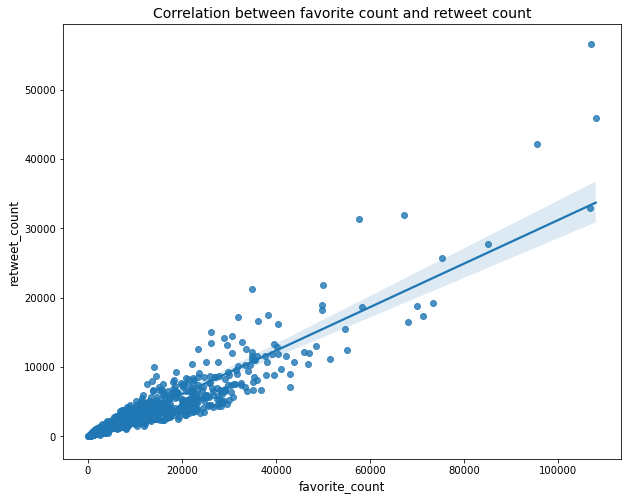

In [320]:
# scatter plot for correlation between  favorite (like) count and retweet count
plt.figure(figsize=(10, 8))
plt.title("Correlation between favorite count and retweet count", fontsize=14)
plt.xlabel("Favorite Count", fontsize= 12)
plt.ylabel("Retweet Count", fontsize=12)
sns.regplot(x=df_archive_clean.favorite_count, y= df_archive_clean.retweet_count)

###### 2. looking for the most used dog name in the datframe

In [321]:
df_archive_clean.name.value_counts().nlargest(12)

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        7
the         7
Toby        7
Daisy       7
Name: name, dtype: int64

> The most used dog name is charlie.

###### 3. looking at the top 10 dog breeds in first, second, and third probability of my dataset.

In [322]:
df_archive_clean['first_probability'].value_counts().nlargest(10)

golden retriever      95
labrador retriever    66
pembroke              65
chihuahua             59
pug                   41
chow                  32
toy poodle            28
pomeranian            26
samoyed               23
malamute              22
Name: first_probability, dtype: int64

> Ploting a graph to represent the above info

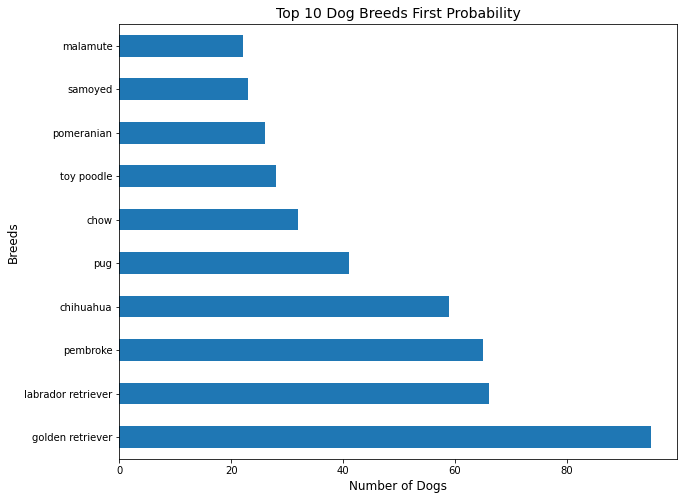

In [323]:
# Bar chart 
first_probability = df_archive_clean.first_probability.value_counts().nlargest(10)
first_probability.plot(kind='barh', figsize=(10,8));
plt.xlabel('Number of Dogs', fontsize=12)
plt.ylabel('Breeds', fontsize=12)
plt.title('Top 10 Dog Breeds First Probability', fontsize=14)
plt.show();

It seems people like golden retriever more than the rest.

In [324]:
df_archive_clean['second_probability'].value_counts().nlargest(10)

labrador retriever          67
golden retriever            62
cardigan                    55
french bulldog              30
pomeranian                  29
toy poodle                  28
chihuahua                   28
chesapeake bay retriever    28
miniature poodle            24
pembroke                    23
Name: second_probability, dtype: int64

> Ploting a graph to represent the above info

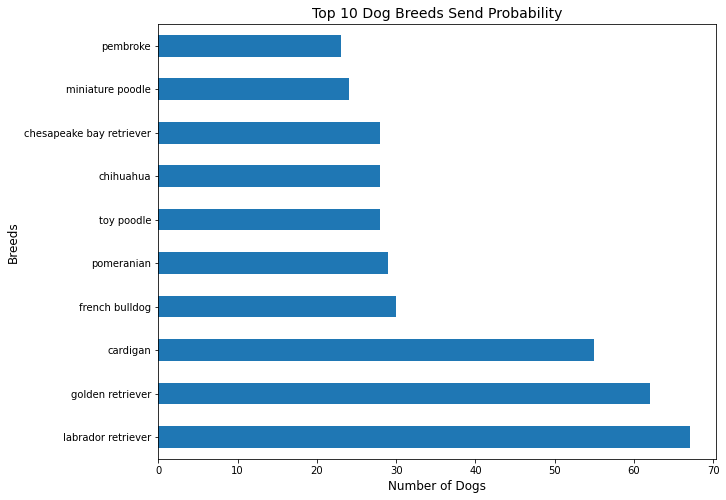

In [325]:
# Bar chart 
second_probability = df_archive_clean.second_probability.value_counts().nlargest(10)
second_probability.plot(kind='barh', figsize=(10,8));
plt.xlabel('Number of Dogs', fontsize=12)
plt.ylabel('Breeds', fontsize=12)
plt.title('Top 10 Dog Breeds Send Probability', fontsize=14)
plt.show();

It seems people like labrador retriver more than the rest.

In [326]:
df_archive_clean['third_probability'].value_counts().nlargest(10)

labrador retriever    57
chihuahua             42
kelpie                29
golden retriever      28
chow                  25
beagle                24
toy poodle            23
eskimo dog            23
pembroke              22
cocker spaniel        22
Name: third_probability, dtype: int64

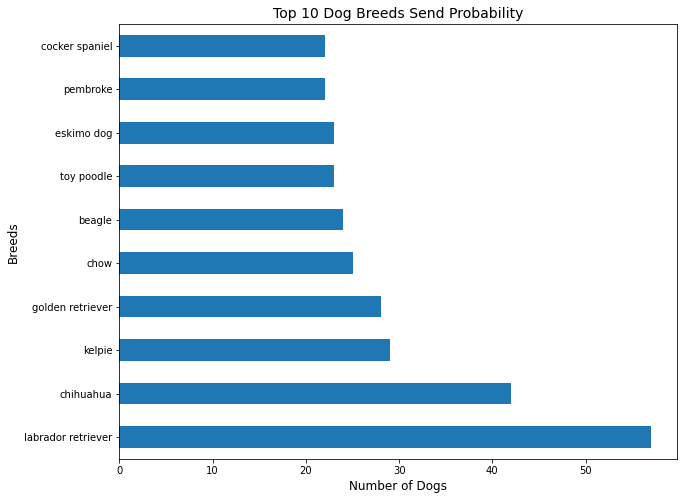

In [327]:
# Bar chart 
third_probability = df_archive_clean.third_probability.value_counts().nlargest(10)
third_probability.plot(kind='barh', figsize=(10,8));
plt.xlabel('Number of Dogs', fontsize=12)
plt.ylabel('Breeds', fontsize=12)
plt.title('Top 10 Dog Breeds Send Probability', fontsize=14)
plt.show();

##### Lets try to plot a graph to show both favorite count and retweet count over time

Text(0, 0.5, 'Counts')

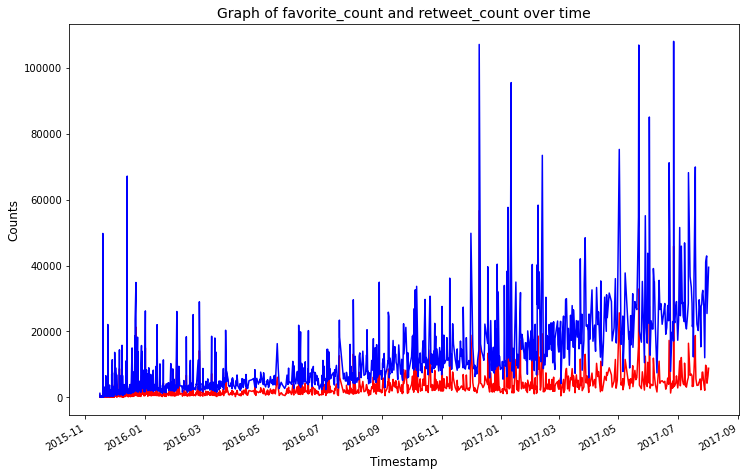

In [328]:
# To plot using timestamp data
df_archive_clean.set_index('timestamp', inplace=True)

# Now ploting the graph of favorite_count and retweet_count over time
plt.figure(figsize=(12, 8))
df_archive_clean['retweet_count'].plot(color = 'red', label='Retweets')
df_archive_clean['favorite_count'].plot(color = 'blue', label='Favorites')
plt.title('Graph of favorite_count and retweet_count over time', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Counts', fontsize=12)


> Graph shows that there have been an increase in both favorite count and retweet count over time.